In [1]:
from trends_analyzer.trends_analyzer.analyzer_modules import TimeSeriesAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
from pytrends.request import TrendReq

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
keyword = 'dogs'
timeframe = '2022-01-01 2023-01-01'

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], timeframe=timeframe)
data = pytrends.interest_over_time()[keyword].dropna()
trend_name = TimeSeriesAnalyzer(keyword=keyword, timeframe=timeframe, data=data)

In [4]:
# 2. Вычисление скользящего среднего
moving_avg = trend_name.calculate_moving_average(window_size = 7)
print("\nСкользящее среднее:")
print(moving_avg.head())



Скользящее среднее:
date
2021-12-26   NaN
2022-01-02   NaN
2022-01-09   NaN
2022-01-16   NaN
2022-01-23   NaN
Name: dogs, dtype: float64


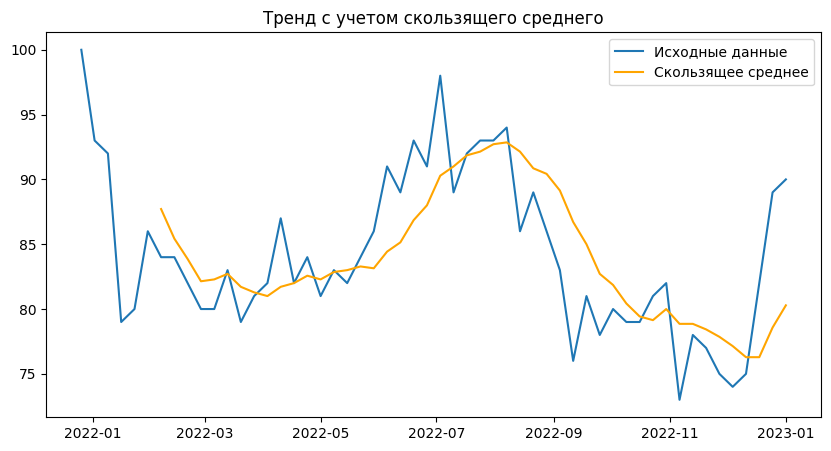

In [5]:
# График скользящего среднего
plt.figure(figsize=(10, 5))
plt.plot(trend_name.data, label="Исходные данные")
plt.plot(moving_avg, label="Скользящее среднее", color="orange")
plt.title("Тренд с учетом скользящего среднего")
plt.legend()
plt.show()

In [6]:
# 3. Вычисление дифференциала
differential = trend_name.calculate_differential()
print("\nДифференциал скользящего среднего:")
print(differential.head())


Дифференциал скользящего среднего:
date
2021-12-26   NaN
2022-01-02   NaN
2022-01-09   NaN
2022-01-16   NaN
2022-01-23   NaN
Name: dogs, dtype: float64


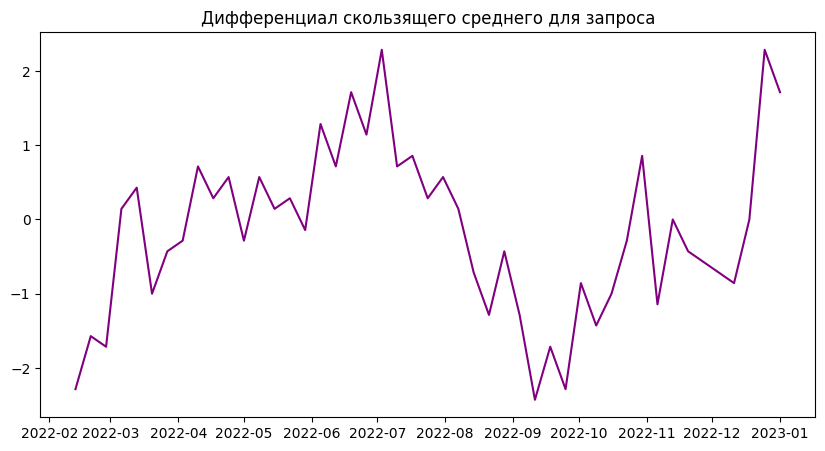

In [7]:
# График дифференциала
plt.figure(figsize=(10, 5))
plt.plot(differential, color="purple")
plt.title("Дифференциал скользящего среднего для запроса")
plt.show()

In [8]:
# 5. Поиск максимумов и минимумов
maxima = trend_name.find_maxima()
minima = trend_name.find_minima()
print("\nЛокальные максимумы:")
print(maxima.head())
print("\nЛокальные минимумы:")
print(minima.head())


Локальные максимумы:
date
2022-03-13    82.714286
2022-04-24    82.571429
2022-05-22    83.285714
2022-08-07    92.857143
2022-10-30    80.000000
Name: dogs, dtype: float64

Локальные минимумы:
date
2022-02-27    82.142857
2022-04-03    81.000000
2022-05-01    82.285714
2022-05-29    83.142857
2022-10-23    79.142857
Name: dogs, dtype: float64


In [9]:
# 4. Автокорреляция
auto_correlation = trend_name.calculate_auto_correlation()
print("\nАвтокорреляция:")
print(auto_correlation.head())


Автокорреляция:
date
2021-12-26   NaN
2022-01-02   NaN
2022-01-09   NaN
2022-01-16   NaN
2022-01-23   NaN
dtype: float64


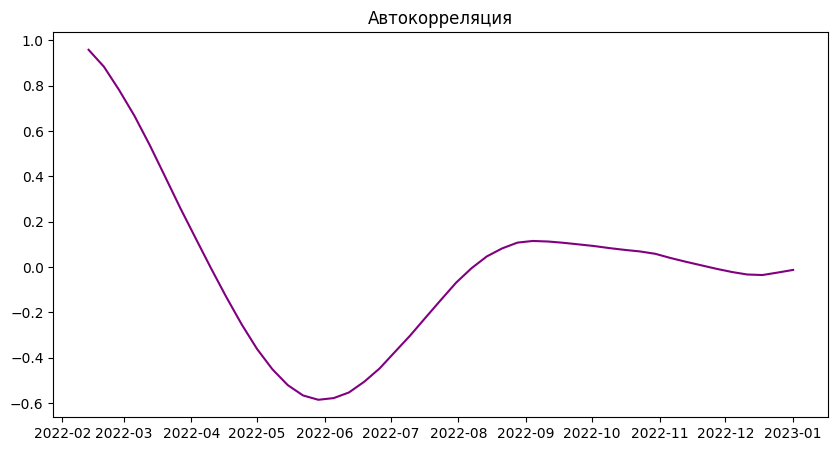

In [10]:
# График автокорреляции
plt.figure(figsize=(10, 5))
plt.plot(auto_correlation, color="purple")
plt.title("Автокорреляция")
plt.show()

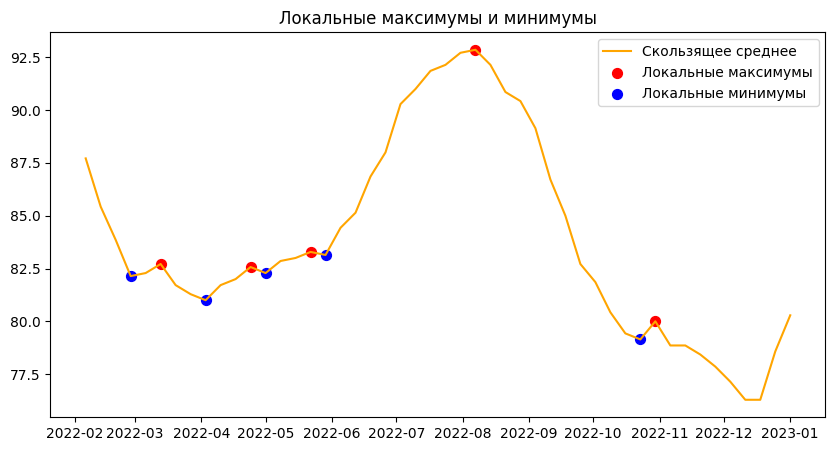

In [11]:
# График максимумов и минимумов
plt.figure(figsize=(10, 5))
plt.plot(moving_avg, label="Скользящее среднее", color="orange")
plt.scatter(maxima.index, maxima.values, color='red', label="Локальные максимумы", s=50)
plt.scatter(minima.index, minima.values, color='blue', label="Локальные минимумы", s=50)
plt.title("Локальные максимумы и минимумы")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Скользящее среднее')

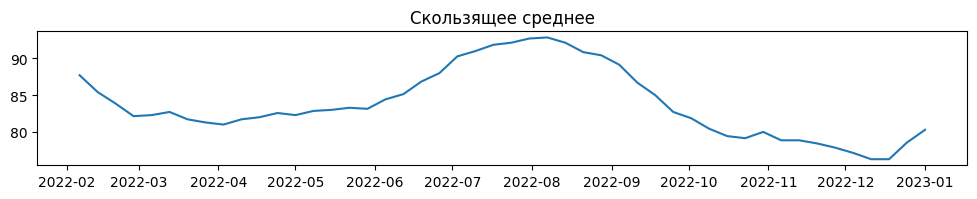

In [12]:
# Графики декомпозиции
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(moving_avg, label="Скользящее среднее")
plt.title("Скользящее среднее")


In [13]:
# 7. Сохранение результатов в DataFrame
results_df = trend_name.get_results()
print("\nИтоговый DataFrame с результатами анализа:")
print(results_df.head())



Итоговый DataFrame с результатами анализа:
            Moving Average  Differential  Auto correlation  Maxima  Minima
date                                                                      
2021-12-26             NaN           NaN               NaN     NaN     NaN
2022-01-02             NaN           NaN               NaN     NaN     NaN
2022-01-09             NaN           NaN               NaN     NaN     NaN
2022-01-16             NaN           NaN               NaN     NaN     NaN
2022-01-23             NaN           NaN               NaN     NaN     NaN


In [14]:
# Сохранение DataFrame в Excel
results_df = trend_name.get_results()
results_df['Original Data'] = data
columns = ['Original Data'] + [col for col in results_df.columns if col != 'Original Data']
results_df = results_df[columns]
print("\nИтоговый DataFrame с результатами анализа:")
print(results_df.head())
# Убедимся, что индекс является DatetimeIndex
if not isinstance(results_df.index, pd.DatetimeIndex):
    results_df.index = pd.to_datetime(results_df.index)

# Преобразование индекса в строковый формат даты
results_df.index = results_df.index.strftime('%Y-%m-%d')

# Сохранение DataFrame в Excel файл
results_df.to_excel("results.xlsx", index=True)
print("Результаты анализа сохранены в 'results.xlsx'")


Итоговый DataFrame с результатами анализа:
            Original Data  Moving Average  Differential  Auto correlation  \
date                                                                        
2021-12-26            100             NaN           NaN               NaN   
2022-01-02             93             NaN           NaN               NaN   
2022-01-09             92             NaN           NaN               NaN   
2022-01-16             79             NaN           NaN               NaN   
2022-01-23             80             NaN           NaN               NaN   

            Maxima  Minima  
date                        
2021-12-26     NaN     NaN  
2022-01-02     NaN     NaN  
2022-01-09     NaN     NaN  
2022-01-16     NaN     NaN  
2022-01-23     NaN     NaN  
Результаты анализа сохранены в 'results.xlsx'
